Getting Started With Algorithmic Feature Selection

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly

In [2]:
#Let's read in our market data
data = pd.read_csv("EURUSD RSI Algorithmic Input Selection.csv")
data['Bull'] = np.NaN

data.loc[data['True Close'] > data['True Close'].shift(10),'Bull'] = 1
data.loc[data['True Close'] < data['True Close'].shift(10),'Bull'] = 0

data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)

Let's Estimate The Market Returns From The Data We Have

In [77]:
#Estimate the market returns
#Define our forecast horizon
HORIZON = 10
data['Target'] = 0

data['Return'] = data['True Close'].shift(-HORIZON) - data['True Close']
data.loc[data['Return'] > 0,'Target'] = 1

#Drop missing values
data.dropna(inplace=True)

data

Time  True Close     Open     High      Low    Close  \
0     2013.07.12 00:00:00     1.30651  0.00791  0.00292 -0.00080 -0.00026   
1     2013.07.14 00:00:00     1.30606 -0.00013 -0.00084  0.00929  0.00860   
2     2013.07.15 00:00:00     1.30581  0.00858  0.00474  0.00704  0.00373   
3     2013.07.16 00:00:00     1.31477  0.00375  0.01536  0.01693  0.02555   
4     2013.07.17 00:00:00     1.31162  0.02555  0.02727  0.02770  0.02871   
...                   ...         ...      ...      ...      ...      ...   
3623  2025.02.28 00:00:00     1.03753 -0.00948 -0.00864 -0.01071 -0.01098   
3624  2025.03.02 00:00:00     1.04120 -0.00811 -0.00653 -0.00372 -0.00362   
3625  2025.03.03 00:00:00     1.04856 -0.00361  0.00425 -0.00124  0.00648   
3626  2025.03.04 00:00:00     1.06231  0.00647  0.01312  0.00522  0.01227   
3627  2025.03.05 00:00:00     1.07943  0.01226  0.02920  0.01526  0.03351   

          RSI 5     RSI 10     RSI 15     RSI 20  ...  Diff RSI 40  \
0     61.254092  53.867758  51.551202  50.782354  ...     0.832825   
1     60.435631  53.495443  51.296712  50.584468  ...     3.273102   
2     59.880006  53.268178  51.146419  50.469458  ...     1.848424   
3     71.583923  60.030167  56.086952  54.382324  ...     7.279708   
4     63.449759  56.818633  54.028841  52.837624  ...     7.971282   
...         ...        ...        ...        ...  ...          ...   
3623  30.328127  41.727616  45.478200  46.820254  ...    -4.010839   
3624  43.019372  47.294503  49.044722  49.480098  ...    -1.198821   
3625  60.881994  56.544888  55.324181  54.304781  ...     2.475791   
3626  77.415465  68.148949  64.163956  61.529703  ...     3.847952   
3627  86.376860  76.741316  71.647732  68.133254  ...     9.966962   

      Diff RSI 45  Diff RSI 50  Diff RSI 55  Diff RSI 60  Diff RSI 65  \
0        0.646602     0.512404     0.411778     0.334162     0.273120   
1        2.816069     2.464906     2.186826     1.961407     1.775280   
2        1.561629     1.344368     1.174375     1.038068     0.926713   
3        6.436262     5.765711     5.219725     4.766483     4.384189   
4        7.069968     6.349511     5.760410     5.269692     4.854574   
...           ...          ...          ...          ...          ...   
3623    -3.432693    -2.997940    -2.662760    -2.398527    -2.186021   
3624    -0.930914    -0.740989    -0.604050    -0.503767    -0.429275   
3625     2.369885     2.259766     2.150132     2.043851     1.942503   
3626     3.661505     3.479225     3.304762     3.140031     2.985775   
3627     9.282100     8.683591     8.155372     7.685620     7.265164   

      Diff RSI 70  Bull  Target   Return  
0        0.224488   0.0       1  0.01251  
1        1.619305   1.0       1  0.02128  
2        0.834412   1.0       1  0.02184  
3        4.057406   1.0       1  0.01387  
4        4.498809   1.0       1  0.01468  
...           ...   ...     ...      ...  
3623    -2.012024   0.0       1  0.05101  
3624    -0.373218   0.0       1  0.04429  
3625     1.846831   1.0       1  0.03960  
3626     2.842015   1.0       1  0.02565  
3627     6.886668   1.0       1  0.01238  

[3628 rows x 37 columns]

Drop All The Data That Overlaps With Our Back Test

In [78]:
#No cheating boys.
_ = data.iloc[((-365 * 3) + 95):,:]
data = data.iloc[:((-365 * 3) + 95),:]
data

Time  True Close     Open     High      Low    Close  \
0     2013.07.12 00:00:00     1.30651  0.00791  0.00292 -0.00080 -0.00026   
1     2013.07.14 00:00:00     1.30606 -0.00013 -0.00084  0.00929  0.00860   
2     2013.07.15 00:00:00     1.30581  0.00858  0.00474  0.00704  0.00373   
3     2013.07.16 00:00:00     1.31477  0.00375  0.01536  0.01693  0.02555   
4     2013.07.17 00:00:00     1.31162  0.02555  0.02727  0.02770  0.02871   
...                   ...         ...      ...      ...      ...      ...   
2623  2021.12.14 00:00:00     1.12577 -0.00358 -0.00240 -0.00423 -0.00483   
2624  2021.12.15 00:00:00     1.12905 -0.00483 -0.00343 -0.00450 -0.00189   
2625  2021.12.16 00:00:00     1.13339 -0.00151  0.00477 -0.00205  0.00295   
2626  2021.12.17 00:00:00     1.12380  0.00294  0.00388 -0.00315 -0.00458   
2627  2021.12.19 00:00:00     1.12432 -0.00454 -0.00542  0.00074 -0.00294   

          RSI 5     RSI 10     RSI 15     RSI 20  ...  Diff RSI 40  \
0     61.254092  53.867758  51.551202  50.782354  ...     0.832825   
1     60.435631  53.495443  51.296712  50.584468  ...     3.273102   
2     59.880006  53.268178  51.146419  50.469458  ...     1.848424   
3     71.583923  60.030167  56.086952  54.382324  ...     7.279708   
4     63.449759  56.818633  54.028841  52.837624  ...     7.971282   
...         ...        ...        ...        ...  ...          ...   
2623  32.961630  39.049542  39.305429  39.126019  ...     0.011259   
2624  49.076899  46.337027  44.058330  42.686277  ...     1.652114   
2625  63.563743  54.359754  49.648215  47.003360  ...     4.153562   
2626  35.594500  39.764069  40.149945  39.996012  ...     1.369943   
2627  37.459702  40.722974  40.807835  40.502286  ...     2.056396   

      Diff RSI 45  Diff RSI 50  Diff RSI 55  Diff RSI 60  Diff RSI 65  \
0        0.646602     0.512404     0.411778     0.334162     0.273120   
1        2.816069     2.464906     2.186826     1.961407     1.775280   
2        1.561629     1.344368     1.174375     1.038068     0.926713   
3        6.436262     5.765711     5.219725     4.766483     4.384189   
4        7.069968     6.349511     5.760410     5.269692     4.854574   
...           ...          ...          ...          ...          ...   
2623    -0.008731    -0.035092    -0.063417    -0.091424    -0.117933   
2624     1.455703     1.285687     1.137691     1.008231     0.894526   
2625     3.699074     3.317310     2.991818     2.711102     2.466817   
2626     1.205129     1.055242     0.920137     0.798923     0.690465   
2627     1.821715     1.615185     1.433026     1.271983     1.129305   

      Diff RSI 70  Bull  Target   Return  
0        0.224488   0.0       1  0.01251  
1        1.619305   1.0       1  0.02128  
2        0.834412   1.0       1  0.02184  
3        4.057406   1.0       1  0.01387  
4        4.498809   1.0       1  0.01468  
...           ...   ...     ...      ...  
2623    -0.142360   0.0       1  0.00658  
2624     0.794327   0.0       1  0.00394  
2625     2.252705   1.0       0 -0.00207  
2626     0.593584   0.0       1  0.01218  
2627     1.002669   0.0       1  0.00793  

[2628 rows x 37 columns]

Visualize The Distribution of Market Returns

<Axes: title={'center': 'Distribution of EURUSD 10 Day Returns'}, xlabel='Return', ylabel='Count'>

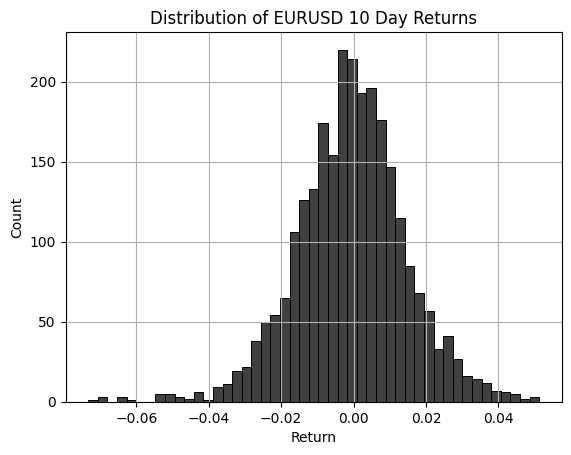

In [99]:
plt.title('Distribution of EURUSD 10 Day Returns')
plt.grid()
sns.histplot(data['Return'],color='black')

c:\Users\Westwood\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning:

invalid value encountered in log



<Axes: title={'center': 'Distribution of Log EURUSD 10 Day Returns'}, xlabel='Return', ylabel='Count'>

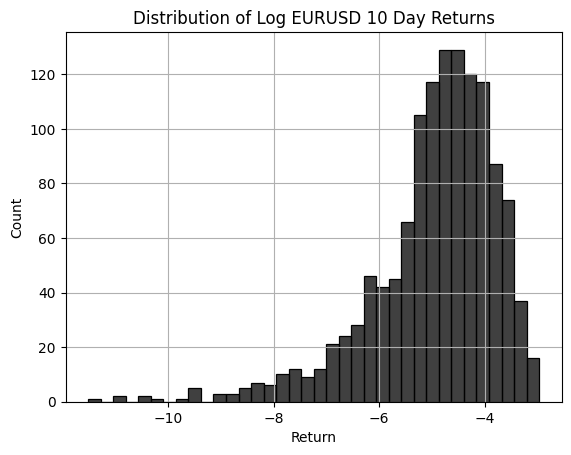

In [100]:
plt.title('Distribution of Log EURUSD 10 Day Returns')
plt.grid()
sns.histplot(np.log(data['Return']),color='black')

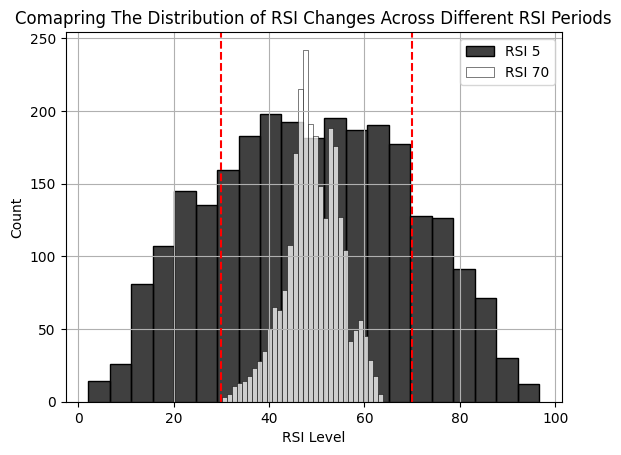

In [98]:
plt.title('Comapring The Distribution of RSI Changes Across Different RSI Periods')
sns.histplot(data['RSI 5'],color='black')
sns.histplot(data['RSI 70'],color='white')
plt.xlabel('RSI Level')
plt.legend(['RSI 5','RSI 70'])
plt.axvline(30,color='red',linestyle='--')
plt.axvline(70,color='red',linestyle='--')
plt.grid()

Let's Analyze The Relationships In The Data

<Axes: >

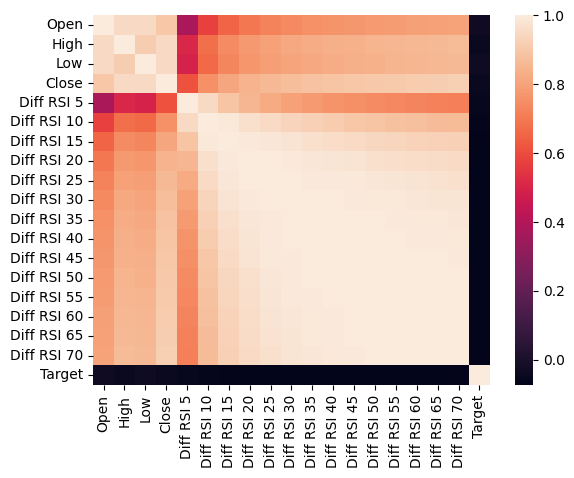

In [82]:
#Poor correlation with the target.
sns.heatmap(data.loc[:,['Open', 'High', 'Low', 'Close','Diff RSI 5',
       'Diff RSI 10', 'Diff RSI 15', 'Diff RSI 20', 'Diff RSI 25',
       'Diff RSI 30', 'Diff RSI 35', 'Diff RSI 40', 'Diff RSI 45',
       'Diff RSI 50', 'Diff RSI 55', 'Diff RSI 60', 'Diff RSI 65',
       'Diff RSI 70','Target']].corr())

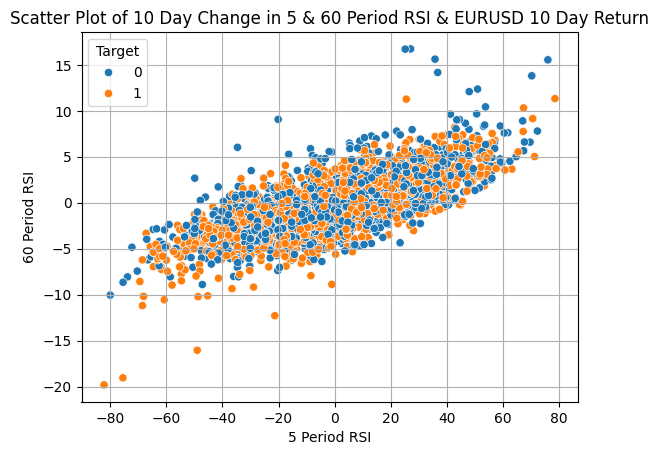

In [87]:
plt.title('Scatter Plot of 10 Day Change in 5 & 60 Period RSI & EURUSD 10 Day Return')
sns.scatterplot(data,y='Diff RSI 60',x='Diff RSI 5',hue='Target')
plt.xlabel('5 Period RSI')
plt.ylabel('60 Period RSI')
plt.grid()

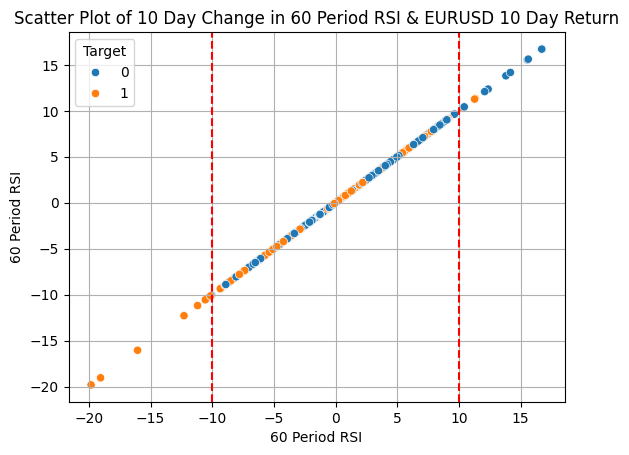

In [84]:
plt.title('Scatter Plot of 10 Day Change in 60 Period RSI & EURUSD 10 Day Return')
sns.scatterplot(data,y='Diff RSI 60',x='Diff RSI 60',hue='Target')
plt.xlabel('60 Period RSI')
plt.ylabel('60 Period RSI')
plt.grid()
plt.axvline(-10,color='red',linestyle='--')
plt.axvline(10,color='red',linestyle='--')

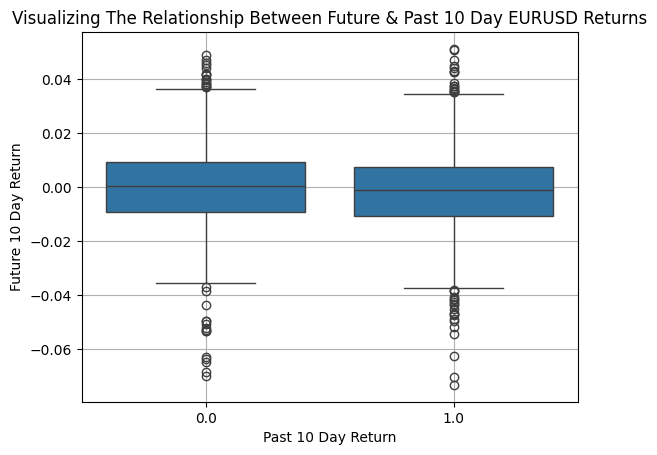

In [96]:
plt.title('Visualizing The Relationship Between Future & Past 10 Day EURUSD Returns')
sns.boxplot(data=data,x='Bull',y='Return')
plt.xlabel('Past 10 Day Return')
plt.ylabel('Future 10 Day Return')

plt.grid()

In [103]:
import plotly.express as px

fig = px.scatter_3d(data,x='Diff RSI 50',y='Diff RSI 5',z='Bull',color='Target')
fig.update_traces(marker=dict(size=5))

In [105]:
import plotly.express as px

fig = px.scatter_3d(data,x='Diff RSI 30',y='Diff RSI 30',z='Diff RSI 30',color='Target')
fig.update_traces(marker=dict(size=3))

Let's Try To Algorithmically Pick The Best RSI Period To Use

In [6]:
#Import our numerical libraries
from sklearn.model_selection import TimeSeriesSplit,cross_val_score
from sklearn.linear_model import Ridge

In [7]:
#Define the cross validation rules we need
tscv = TimeSeriesSplit(n_splits=5,gap=HORIZON)

In [101]:
#Set the max levels we wish to check
ALPHA_LEVELS = 10
TOL_LEVELS   = 10

#DataFrame labels
r_c = 'TOL_LEVEL_'
r_r = 'ALHPA_LEVEL_'

results_columns = []
results_rows = []

for c in range(TOL_LEVELS):
    n_c = r_c + str(c)
    n_r = r_r + str(c)
    results_columns.append(n_c)
    results_rows.append(n_r)

#Create a DataFrame to store our results
results = pd.DataFrame(columns=results_columns,index=results_rows)

#Cross validate our model
for i in range(TOL_LEVELS):
    tol = 10 ** (-i)
    error = []
    for j in range(ALPHA_LEVELS):
        #Set alpha
        alpha = 10 ** (-j)
        
        #Its good practice to generally check the 0 case
        if(i == 0 & j == 0):
            model = Ridge(alpha=j,tol=i,solver='sparse_cg')

        #Otherwise use a float
        model = Ridge(alpha=alpha,tol=tol,solver='sparse_cg')

        #Store the error levels
        error.append(np.mean(np.abs(cross_val_score(model,data.loc[:,['Diff RSI 5',
       'Diff RSI 10', 'Diff RSI 15', 'Diff RSI 20', 'Diff RSI 25',
       'Diff RSI 30', 'Diff RSI 35', 'Diff RSI 40', 'Diff RSI 45',
       'Diff RSI 50', 'Diff RSI 55', 'Diff RSI 60', 'Diff RSI 65',
       'Diff RSI 70',]],data['Return'],cv=tscv))))
    
    #Record the error levels
    results.iloc[:,i] = error
    
results.mean(axis=1)
    

C:\Users\Westwood\AppData\Local\Temp\ipykernel_3532\4151094983.py:44: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Westwood\AppData\Local\Temp\ipykernel_3532\4151094983.py:44: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Westwood\AppData\Local\Temp\ipykernel_3532\4151094983.py:44: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique

ALHPA_LEVEL_0    0.053509
ALHPA_LEVEL_1    0.056245
ALHPA_LEVEL_2    0.060158
ALHPA_LEVEL_3    0.062230
ALHPA_LEVEL_4    0.061521
ALHPA_LEVEL_5    0.064312
ALHPA_LEVEL_6    0.073248
ALHPA_LEVEL_7    0.079310
ALHPA_LEVEL_8    0.081914
ALHPA_LEVEL_9    0.085171
dtype: float64

In [9]:
import plotly.graph_objects as go

fig = go.Figure(data =
    go.Contour(
        z=results,
        colorscale='bluered'
    ))

fig.update_layout(
    width = 600,
    height = 400,
    title='Contour Plot Of Our Error Forecasting EURUSD Using Grid Search '
)

fig.show()

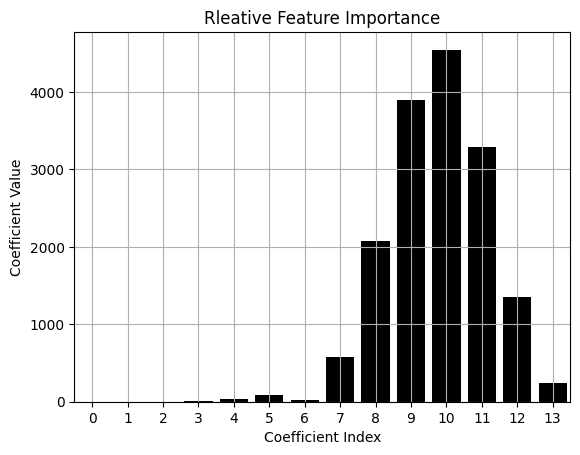

In [108]:
#Let's visualize the importance of each column
model = Ridge(alpha=0,tol=0,solver='sparse_cg')

model.fit(data.loc[:,['Diff RSI 5',
       'Diff RSI 10', 'Diff RSI 15', 'Diff RSI 20', 'Diff RSI 25',
       'Diff RSI 30', 'Diff RSI 35', 'Diff RSI 40', 'Diff RSI 45',
       'Diff RSI 50', 'Diff RSI 55', 'Diff RSI 60', 'Diff RSI 65',
       'Diff RSI 70',]],data['Return'])

#Clearly our model relied on the 25 Period RSI the most, from all the data it had available at training
sns.barplot(np.abs(model.coef_),color='black')
plt.title('Rleative Feature Importance')
plt.ylabel('Coefficient Value')
plt.xlabel('Coefficient Index')
plt.grid()

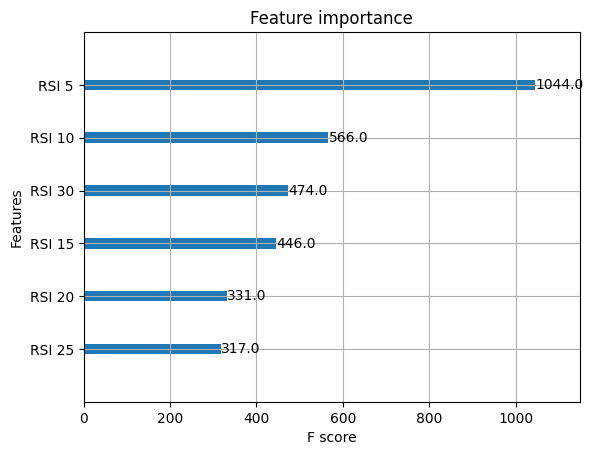

In [264]:
import xgboost as xgb
from xgboost import plot_importance

# Train XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(data.loc[:,['RSI 5','RSI 10','RSI 15','RSI 20','RSI 25','RSI 30']],data['Return'])

# Plot Feature Importance
plot_importance(xgb_model)
plt.show()


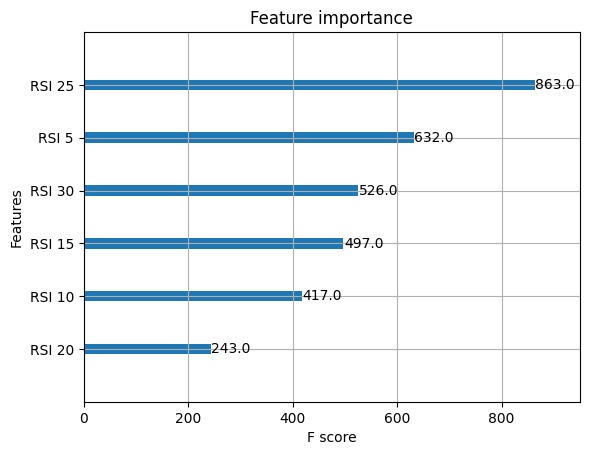

In [271]:
# Train XGBoost Model
xgb_model = xgb.XGBRegressor()
xgb_model.fit(data.loc[:,['RSI 25','RSI 30','RSI 15','RSI 10','RSI 20','RSI 5']],data['Return'])

# Plot Feature Importance
plot_importance(xgb_model)
plt.show()

In [109]:
def objective(x):
    data = pd.read_csv("EURUSD RSI Algorithmic Input Selection.csv")
    data['0'] = 0
    data['1'] = 0
    data['2'] = 0
    HORIZON = 10
    data['Return'] = data['True Close'].shift(-HORIZON) - data['True Close']
    data.dropna(subset=['Return'],inplace=True)
    data.iloc[data['Diff RSI 55'] > x[0],12] = 1
    data.iloc[data['Diff RSI 55'] < x[1],13] = 1
    data.iloc[(data['Diff RSI 55'] < x[0]) & (data['RSI 55'] > x[1]),14] = 1
    #Calculate or RMSE When using those levels
    model = Ridge(alpha=0,tol=0,solver='sparse_cg')
    error = np.mean(np.abs(cross_val_score(model,data.iloc[:,12:15],data['Return'],cv=tscv)))
    return(error)

In [110]:
#Bad rules for using the RSI
objective([0,0])

0.026897725573317266

In [111]:
#Bad rules for using the RSI
objective([70,30])

0.031258730612736006

In [116]:
LEVELS  = 10
results = []

for i in np.arange(0,(LEVELS)):
    results.append(objective([i * 10,-(i * 10)]))

Text(0.5, 1.0, 'Measuring The Strength of Changes In RSI Levels')

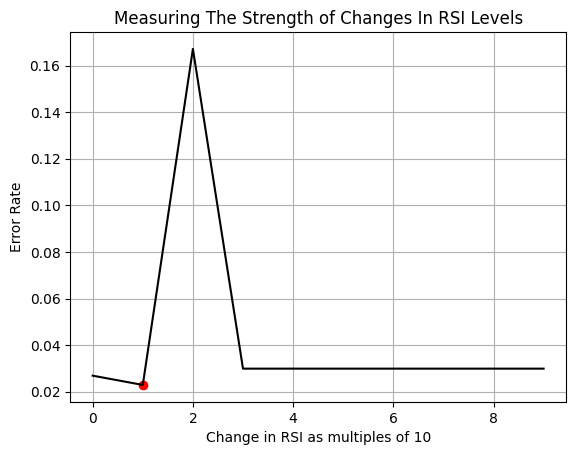

In [117]:
plt.plot(results,color='black')
plt.ylabel('Error Rate')
plt.xlabel('Change in RSI as multiples of 10')
plt.grid()
plt.scatter(results.index(min(results)),min(results),color='red')
plt.title('Measuring The Strength of Changes In RSI Levels')

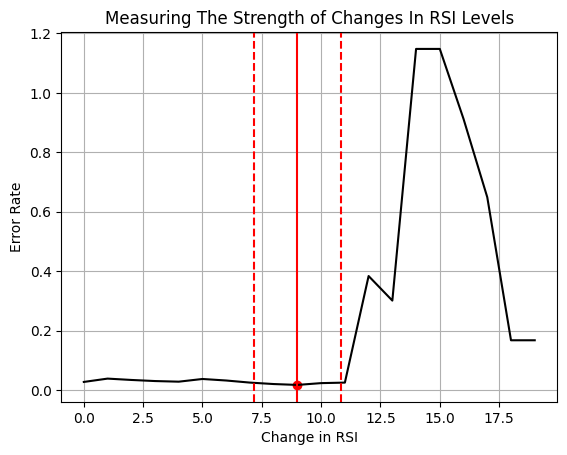

In [118]:
LEVELS  = 20
coef = 0.5
results = []

for i in np.arange(0,(LEVELS),1):
    results.append(objective([i,-(i)]))

plt.plot(results,color='black')
plt.ylabel('Error Rate')
plt.xlabel('Change in RSI')
plt.grid()
plt.scatter(results.index(min(results)),min(results),color='red')
plt.title('Measuring The Strength of Changes In RSI Levels')


plt.axvline(results.index(min(results)),color='red')
plt.axvline(results.index(min(results)) - (coef * np.std(data['Diff RSI 55'])),linestyle='--',color='red')
plt.axvline(results.index(min(results)) + (coef * np.std(data['Diff RSI 55'])),linestyle='--',color='red')

Text(0.5, 1.0, 'Visualizing our Optimal Point in The Distribution')

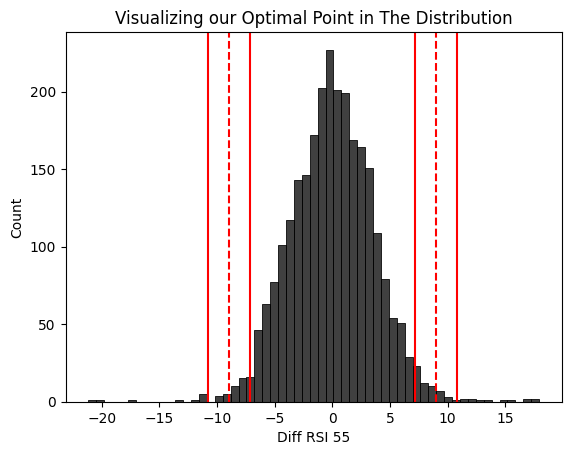

In [120]:
sns.histplot(data['Diff RSI 55'],color='black')
coef = 0.5
plt.axvline((results.index(min(results))),linestyle='--',color='red')
plt.axvline(results.index(min(results)) - (coef * np.std(data['Diff RSI 55'])),color='red')
plt.axvline(results.index(min(results)) + (coef * np.std(data['Diff RSI 55'])),color='red')
plt.axvline(-(results.index(min(results))),linestyle='--',color='red')
plt.axvline(-(results.index(min(results)) - (coef * np.std(data['Diff RSI 55']))),color='red')
plt.axvline(-(results.index(min(results)) + (coef * np.std(data['Diff RSI 55']))),color='red')
plt.title("Visualizing our Optimal Point in The Distribution")

In [21]:
results.index(min(results)) + ( coef * np.std(data['Diff RSI 55']))

10.822857254027287

In [22]:
results.index(min(results)) - (coef * np.std(data['Diff RSI 55']))

7.177142745972713

In [250]:
opt = 9

In [251]:
def explanation(x):
    data = pd.read_csv("EURUSD RSI Algorithmic Input Selection.csv")
    data['0'] = 0
    data['1'] = 0
    data['2'] = 0
    HORIZON = 10
    data['Return'] = data['True Close'].shift(-HORIZON) - data['True Close']
    data.dropna(subset=['Return'],inplace=True)
    data.iloc[data['Diff RSI 55'] > x[0],12] = 1
    data.iloc[data['Diff RSI 55'] < x[1],13] = 1
    data.iloc[(data['Diff RSI 55'] < x[0]) & (data['RSI 55'] > x[1]),14] = 1
    #Calculate or RMSE When using those levels
    model = Ridge(alpha=0,tol=0,solver='sparse_cg')
    model.fit(data.iloc[:,12:15],data['Return'])
    return(model.coef_.copy())

In [252]:
print(explanation([opt,-opt]))

[ 1.97234840e-04 -1.64215118e-04 -7.55222156e-05]


Let's understand why our model learned bearish sentiment

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Independent variable
X = data[['Diff RSI 55']]
#Dependent variable
y = data['Target']

In [54]:
model = RandomForestRegressor()

In [55]:
model.fit(X,y)

RandomForestRegressor()

C:\Users\Westwood\AppData\Local\Temp\ipykernel_3532\3163040832.py:2: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Westwood\AppData\Local\Temp\ipykernel_3532\3163040832.py:3: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



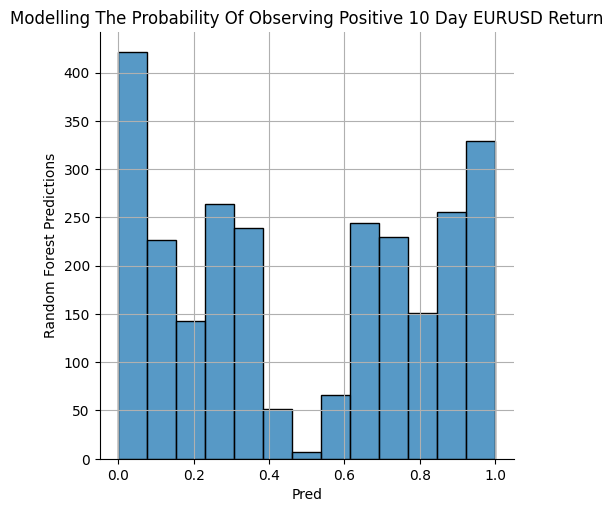

In [74]:
res = pd.DataFrame(columns=['Pred','Class'],index=np.arange(data.shape[0]))
res.loc[:,'Class'] = 0
res.iloc[:,0] = model.predict(X)
sns.displot(res['Pred'])
plt.title('Modelling The Probability Of Observing Positive 10 Day EURUSD Return')
plt.ylabel("Random Forest Predictions")
plt.grid()

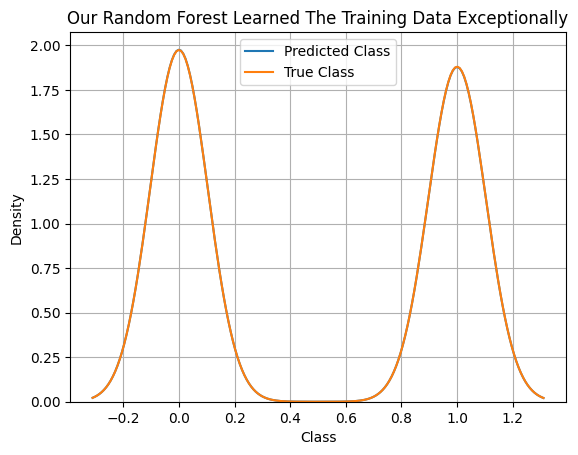

In [67]:
tresh = 0.5
res.loc[res['Pred'] > tresh,'Class'] = 1
sns.kdeplot(res['Class'])
sns.kdeplot(data['Target'])
plt.legend(['Predicted Class','True Class'])
plt.title('Our Random Forest Learned The Training Data Exceptionally')
plt.grid()

In [ ]:
#Our random forest seems to have learned well from the training data
accuracy_score(y,res['Class'])

0.9996194824961948

In [60]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

In [61]:
inital_params = [("float_input",FloatTensorType([1,1]))]

In [68]:
onnx_proto = convert_sklearn(model=model,initial_types=inital_params,target_opset=12)

In [70]:
onnx.save(onnx_proto,"EURUSD Diff RSI 55 D1 1 1.onnx")

In [71]:
import netron

In [72]:
netron.start("EURUSD Diff RSI 55 D1 1 1.onnx")

Serving 'EURUSD Diff RSI 55 D1 1 1.onnx' at http://localhost:8080


('localhost', 8080)